In [57]:
# Carregar bibliotecas
import numpy as np

# Sistema de primeira ordem - S1

In [58]:
# Carregar dados
dados = np.loadtxt('dados_S1.txt',delimiter=',')
#print(dados.shape)
t = dados[:,0]  # tempo
u = dados[:,1]  # entrada
y = dados[:,2]  # saída
mt = 0
i = 0

# Calculo da media dos ultimos valores (em regime permanente)
while i<=50:
    m = dados[550+i,2]
    mt = mt + m
    i += 1
media = mt/50
print(t)
print(u)
print(y)
print(media)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

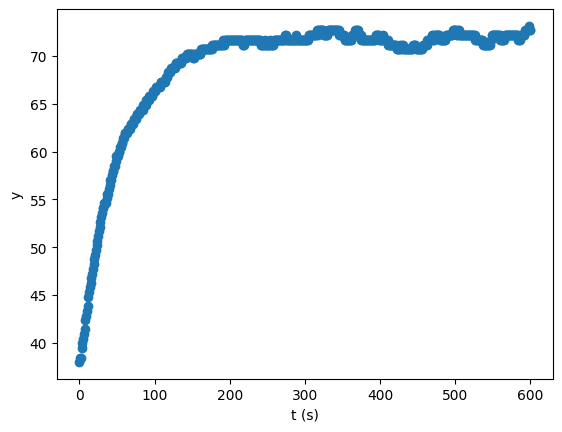

In [59]:
import matplotlib.pyplot as plt

# Gráfico
plt.plot(t,y,'o')
plt.xlabel('t (s)')
plt.ylabel('y')
plt.show()

# Gráfico
Método de ajuste dos parâmetros do modelo, $K$ e $\tau$, usando o ponto correspondente a 63.2% da variação final da resposta ao degrau

In [60]:
delta_u = dados[1,1] #50% pwm
# print(delta_u)

# Método gráfico
K = (y[len(y)-1]-y[0])/delta_u
print(K)
y63 = (y[len(y)-1]-y[0])*0.632+y[0]
print(y63)



0.6940000000000001
59.930400000000006


In [61]:
from scipy.interpolate import interp1d

# Constante de tempo
f = interp1d(y,t)
tau = f(y63)
print(tau)

51.95644444444445


K = 0.6940000000000001
tau = 51.95644444444445
SSE = 470.38426514662143


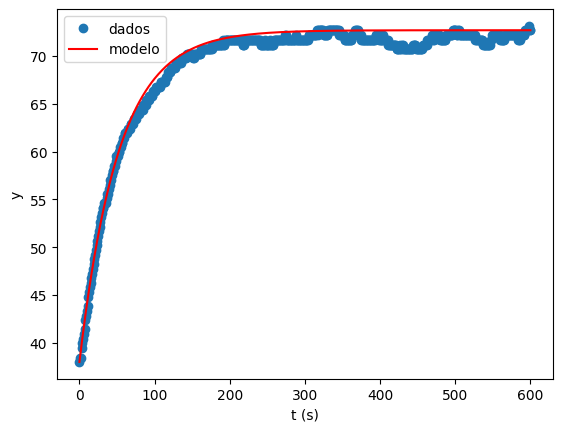

In [62]:
# Resposta do modelo
ym = K*delta_u*(1-np.exp(-t/tau))+y[0]

# Gráficos
plt.plot(t,y,'o')
plt.plot(t,ym,'r-')
plt.xlabel('t (s)')
plt.ylabel('y')
plt.legend(['dados','modelo'],loc='best')
#plt.savefig('grafico.png')

# SSE
desvio2 = (y-ym)**2
SSE = np.sum(desvio2)

# Parâmetros
print('K = '+str(K))
print('tau = '+str(tau))
print('SSE = '+str(SSE))

In [63]:

print(f'T0: {y[0]} ºC')
print(f'Tss: {y} ºC')
print(f'T0: {y[0]} ºC')


T0: 38.0 ºC
Tss: [38.   38.45 38.45 39.45 39.95 40.4  40.9  41.4  42.4  42.85 43.35 43.85
 44.8  45.3  45.8  46.3  46.75 47.25 47.75 48.25 48.75 49.2  49.7  50.2
 50.7  51.15 51.65 52.15 52.65 53.15 53.6  54.1  54.1  54.6  54.6  54.6
 55.1  55.55 55.55 56.05 56.55 57.05 57.05 57.55 58.   58.   58.5  58.5
 59.   59.5  59.5  59.5  59.95 59.95 60.45 60.45 60.95 60.95 61.45 61.45
 61.95 61.95 61.95 61.95 62.4  62.4  62.4  62.4  62.9  62.9  62.9  62.9
 63.4  63.4  63.4  63.4  63.9  63.9  63.9  63.9  64.35 64.35 64.35 64.35
 64.35 64.85 64.85 64.85 64.85 65.35 65.35 65.35 65.35 65.85 65.85 65.85
 65.85 65.85 66.3  66.3  66.3  66.3  66.8  66.8  66.8  66.8  66.8  66.8
 67.3  67.3  67.3  67.3  67.3  67.3  67.3  67.8  67.8  67.8  68.3  68.3
 68.3  68.3  68.75 68.75 68.75 68.75 68.75 68.75 69.25 69.25 69.25 69.25
 69.25 69.25 69.25 69.25 69.75 69.75 69.75 69.75 69.75 69.75 69.75 70.25
 70.25 70.25 70.25 70.25 70.25 70.25 70.25 69.75 69.75 70.25 70.25 70.25
 70.25 70.25 70.25 70.25 70.25 70.25 70.

# Manual

K = 0.694
tau = 90
SSE = 4911.2862209286195


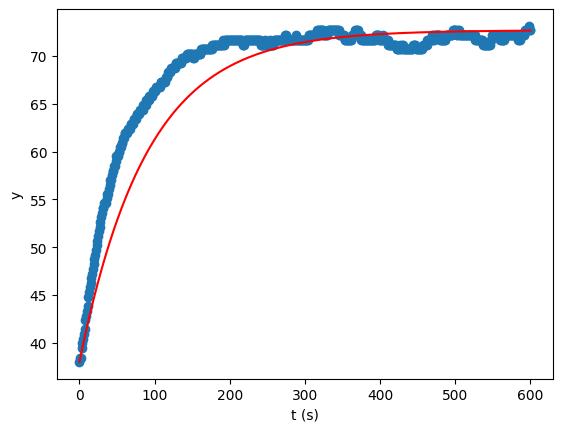

In [64]:
# Ajuste manual
K = 0.694
tau = 90
delta_u = dados[1,1]

# resposta do modelo
ym = K*delta_u*(1-np.exp(-t/tau))+y[0]

# gráficos
plt.plot(t,y,'o')
plt.plot(t,ym,'r-')
plt.xlabel('t (s)')
plt.ylabel('y')

# SSE
desvio2 = (y-ym)**2
SSE = np.sum(desvio2)
print('K = '+str(K))
print('tau = '+str(tau))
print('SSE = '+str(SSE))

In [65]:
# Método gráfico
K = (y[len(y)-1]-y[0])/delta_u
print(K)
y63 = (y[len(y)-1]-y[0])*0.632+y[0]
print(y63)

0.6940000000000001
59.930400000000006


In [66]:
from scipy.interpolate import interp1d

# Constante de tempo
f = interp1d(y,t)
tau = f(y63)
print(tau)

51.95644444444445


K = 0.6940000000000001
tau = 51.95644444444445
SSE = 470.38426514662143


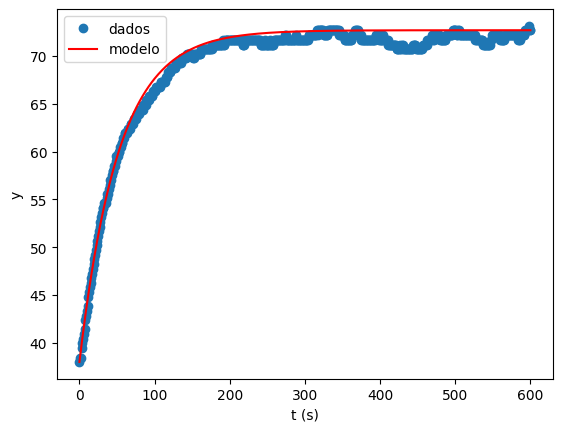

In [67]:
# Resposta do modelo
ym = K*delta_u*(1-np.exp(-t/tau))+y[0]

# Gráficos
plt.plot(t,y,'o')
plt.plot(t,ym,'r-')
plt.xlabel('t (s)')
plt.ylabel('y')
plt.legend(['dados','modelo'],loc='best')
#plt.savefig('grafico.png')

# SSE
desvio2 = (y-ym)**2
SSE = np.sum(desvio2)

# Parâmetros
print('K = '+str(K))
print('tau = '+str(tau))
print('SSE = '+str(SSE))

# Optimização 

In [68]:
# Resposta do modelo
def modelo(x):
    K,tau = x
    ym = K*delta_u*(1-np.exp(-t/tau))+y[0]
    return ym

In [69]:
# Função objetivo: SSE
def obj(x):
    return np.sum((y-modelo(x))**2)    
    

SSE inicial:40986.432710002344


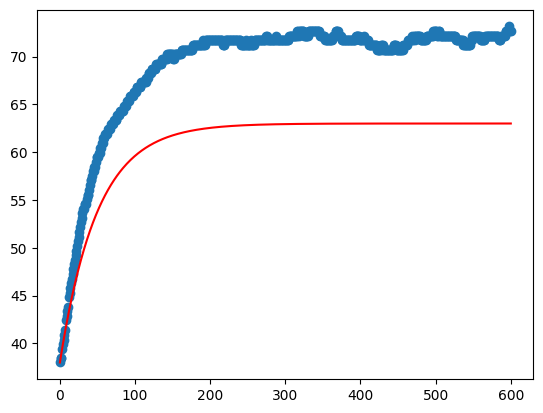

In [70]:
# Estimativa inicial
x0 = np.array([0.5,50])
# x0 = np.ones(2)*0.4
# print(x0)

# SSE inicial
print('SSE inicial:' + str(obj(x0)))

# Gráfico
plt.plot(t,y,'o')
plt.plot(t,modelo(x0),'r-')
plt.show()

K = 0.6782316659735179
tau = 52.00167606987284
SSE: 143.7315885927589


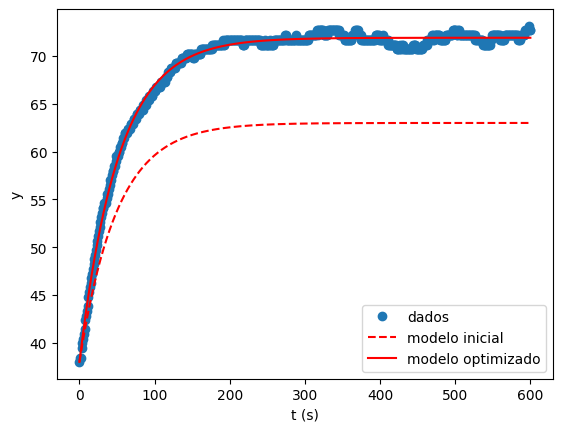

In [71]:
from scipy.optimize import minimize

# Optimização
sol = minimize(obj,x0)
xopt = sol.x
ym = modelo(xopt)

# Parâmetros optimizados
print('K = ' + str(xopt[0]))
print('tau = ' + str(xopt[1]))
print('SSE: ' + str(obj(xopt)))

# Gráficos
plt.plot(t,y,'o')
plt.plot(t,modelo(x0),'r--')
plt.plot(t,ym,'r-');
plt.xlabel('t (s)')
plt.ylabel('y')
plt.legend(['dados','modelo inicial','modelo optimizado'],loc='best')
plt.savefig('grafico.png')

# Alinea c)

In [77]:
# Alinea c)

delta_t=media-y[0]
kt=delta_t/delta_u


print(f'T0: {y[0]} ºC')
print(f'Tss: {media} ºC') # media dos ultimos valores
print(f'delta_T: {delta_t} ºC')
#print(f'K: {kt}') #delta t / delta u
print(f'K: {xopt[0]}') #otimizado
print(f'Tau: {xopt[1]} s')
print(f'SSE: {obj(xopt)}')

T0: 38.0 ºC
Tss: 73.64299999999994 ºC
delta_T: 35.642999999999944 ºC
K: 0.7128599999999988
K: 0.6782316659735179
Tau: 52.00167606987284 s
SSE: 143.7315885927589


# Sistema de Primeira Ordem com Atraso

In [ ]:
dados = np.loadtxt('dados_S2.txt',delimiter=',')
#print(dados.shape)
t = dados[:,0]  # tempo
u = dados[:,1]  # entrada
y = dados[:,2]  # saída
mt = 0
i = 0
while i<=50:
    m = dados[550+i,2]
    mt = mt + m
    i += 1
media = mt/50
print(t)
print(u)
print(y)
print(media)